<h1 style='color:Orange;font-size:30px;text-align:center'> Introduction</h1>

Spam detection is the process of detecting the spam or fake messages from our email. For this application, we use deep learning technique and Google bert transformer to find whether our email contains spam or not. For validation purpose, we use few random messages to identify or test whether the model is working properly or not.

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive

In [ ]:
drive.mount('/content/drive')
file_path = "/content/drive/My Drive/spam.csv"

Mounted at /content/drive


In [ ]:
df=pd.read_csv(file_path,encoding = 'ISO-8859-1')

In [ ]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5570,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5571,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5572,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5574 non-null   object
 1   v2          5573 non-null   object
 2   Unnamed: 2  49 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.9+ KB


There are five feature where only two are useful to build my model so I am going to drop last three features name as Unamed:2, Unamed:3, Unamed:4

In [ ]:
df.drop(df.iloc[:,2:],inplace=True,axis=1)

In [ ]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will Ì_ b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df.isnull().sum()

v1    0
v2    1
dtype: int64

In [ ]:
df.rename(columns={'v1':'label','v2':'message'},inplace=True)

In [ ]:
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will Ì_ b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...


To count the number of spam or not spam message in our dataset we use this technique

In [ ]:
print('The total number of spam and not spam message in our dataset is\n',df['label'].value_counts())

The total number of spam and not spam message in our dataset is
 label
ham       4825
spam       747
ham"""       2
Name: count, dtype: int64


In [ ]:
!pip install seaborn

<Axes: xlabel='label', ylabel='count'>

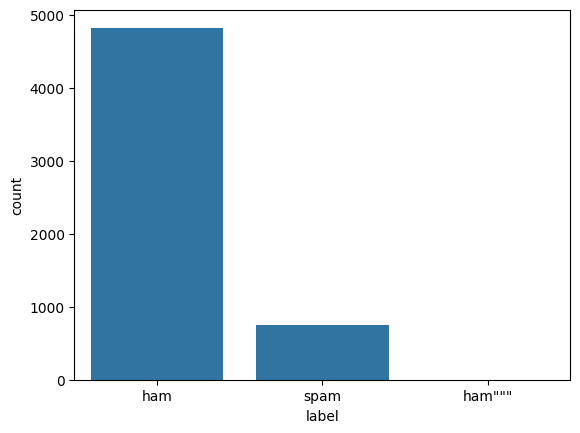

In [ ]:
import seaborn as sns

# sns.countplot(df['label'])
sns.countplot(x='label', data=df)


Well, The main reason to use ktrain is that ktrain comes with integrated bert function which makes our work more easier to build our model. Moreover, ktrain is a lightweight wrapper library for TensorFlow Keras. It can be very helpful in building projects consisting of neural networks. Using this wrapper, we can build, train and deploy deep learning and machine learning models.

### ktrain

ktrain is a lightweight wrapper for the deep learning library Keras to help build, train, and deploy neural networks. With only a few lines of code, ktrain allows you to easily and quickly:

   - estimate an optimal learning rate for your model given your data using a Learning Rate Finder
   -  utilize learning rate schedules such as the triangular policy, the 1cycle policy, and SGDR to effectively minimize loss and improve generalization
   - employ fast and easy-to-use pre-canned models for both text classification (e.g., NBSVM, fastText, logreg) and image classification (e.g., ResNet, Wide ResNet, Inception)
   - load and preprocess text and image data from a variety of formats
   -  inspect data points that were misclassified to help improve your model
   - leverage a simple prediction API for saving and deploying both models and data-preprocessing steps to make predictions on new raw data

ref: https://github.com/amaiya/ktrain

In [ ]:
%pip install ktrain

In [ ]:
!pip list


In [ ]:
import tensorflow as tf
import ktrain
from ktrain import text

Here, we are splitting the dataset for training and testing purpose, wheree 90% of data are used in training purpose where onyly 10% of data from the same dataset is apply for testing the model.

In [ ]:
split=int(len(df)*0.90)
train_data=df.iloc[:split,:]
test_data=df.iloc[split:,:]

In [ ]:
train_data

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5011,ham,"By the way, 'rencontre' is to meet again. Moun..."
5012,spam,You have WON a guaranteed å£1000 cash or a å£2...
5013,ham,U attend ur driving lesson how many times a wk...
5014,ham,"Uncle G, just checking up on you. Do have a re..."


<h1 style="color:orange;font-size:30px;text-align:center"> Lets fine tune our BERT model</h1>

text_from_df ktrain perform preprocessing of data from dataframe and will return five variables out of it these variables are (x_train,y_train)(x_test,y_test) and preprocess. The arguments inside text_from_df are: train_df is the dataset that are used for training the model, text_column is  text column present in dataframe, label_columns is our traget/output column present in the dataset. maxlen maximum length of word that can be present inside a sentence in case of BERT we can taken maximum length of 512 if we will take sentence length beyond 512 it will give error,however our dataset is small so I have used only maxlen as 300. preprocess_mode this says how the preprocessing has been done, in my case i have preprocessed the textual data using BERT.

In [ ]:
(X_train,y_train),(X_test,y_test),preproc=text.texts_from_df(train_df=train_data,
                text_column='message',label_columns='label',
                   val_df=test_data,maxlen=300,preprocess_mode='bert')

['ham', 'ham"""', 'spam']
   ham  ham"""  spam
0  1.0     0.0   0.0
1  1.0     0.0   0.0
2  0.0     0.0   1.0
3  1.0     0.0   0.0
4  1.0     0.0   0.0
['ham', 'ham"""', 'spam']
      ham  ham"""  spam
5016  1.0     0.0   0.0
5017  1.0     0.0   0.0
5018  0.0     0.0   1.0
5019  1.0     0.0   0.0
5020  1.0     0.0   0.0
preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [ ]:
X_train[0].shape

(5016, 300)

In [ ]:
X_train[0].ndim

2

In [ ]:
X_train[0]

array([[ 101, 2175, 2127, ...,    0,    0,    0],
       [ 101, 7929, 2474, ...,    0,    0,    0],
       [ 101, 2489, 4443, ...,    0,    0,    0],
       ...,
       [ 101, 1057, 5463, ...,    0,    0,    0],
       [ 101, 4470, 1043, ...,    0,    0,    0],
       [ 101, 7592, 2879, ...,    0,    0,    0]])

In [ ]:
X_train[1]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X_train

[array([[ 101, 2175, 2127, ...,    0,    0,    0],
        [ 101, 7929, 2474, ...,    0,    0,    0],
        [ 101, 2489, 4443, ...,    0,    0,    0],
        ...,
        [ 101, 1057, 5463, ...,    0,    0,    0],
        [ 101, 4470, 1043, ...,    0,    0,    0],
        [ 101, 7592, 2879, ...,    0,    0,    0]]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])]

In order to create bert model we use text_classifier with the help of keras ktrain library

Now, we will use get_learner which will wrap the model and data and helps us to used for final prediction of result.

In [ ]:
model=text.text_classifier(name='bert',train_data=(X_train,y_train),preproc=preproc,metrics=['accuracy'])

Is Multi-Label? False
maxlen is 300
done.


In [ ]:
  learner=ktrain.get_learner(model=model,train_data=(X_train,y_train),val_data=(X_test,y_test),batch_size=3)

<h6 style="color:orange;font-size:30px;text-align:center">How to find good learning rate?</h6>
Here, giving learning rate and epochs are hypermeter so choose wisely in order to get better accuracy



learner.lr_find() ->  find optimal learning rate

learner.lr_plot() -> visually identify best learning rate

so look this document  https://github.com/amaiya/ktrain to know more about the ktrain library

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
1672/1672 [==============================] - 106s 52ms/step - loss: 1.4006 - accuracy: 0.8657


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


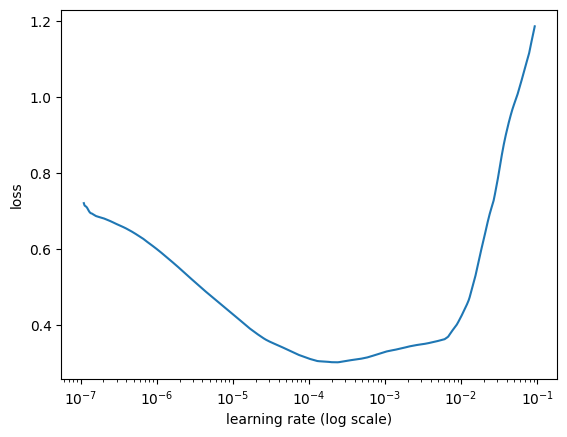

In [ ]:
learner.lr_find()
learner.lr_plot()

In [ ]:
 learner.fit_onecycle(lr=1e-5,epochs=1)



begin training using onecycle policy with max lr of 1e-05...
1672/1672 [==============================] - 127s 67ms/step - loss: 0.0903 - accuracy: 0.9741 - val_loss: 0.0254 - val_accuracy: 0.9928


 In order to predict the new unlabeled data we can use get_predictor method in ktrain library

In [ ]:
predictor=ktrain.get_predictor(learner.model,preproc)

In [ ]:
new_message=['CONGRATULATIONS! You are the lucky online winner of a brand new Sweepstakes Craftsman Tool Shed entry!',

                  'Thank you again for your interest in the Associate Data Scientist position in our company, and for your cooperation in the interview process so far',

               'Fidelity Life - $250K in life insurance for as low as $15 a month! No Exam Option available',
              ]

In [ ]:
predictor.predict(new_message)

['spam', 'ham', 'spam']

<h1 style="color:orange;font-size:30px;text-align:center"> Conclusion </h1>
In above we used three different messages in order to validate our model where fist one and the last one is a spam and middle one is not a spam in the sample emails, however, our model predicted accurately all these messages.

Lets save our model so that it can be use for deploy in application

In [ ]:
predictor.save('Bert_model')